<a href="https://colab.research.google.com/github/1ZeroStorm/Machine_Learning_Projects/blob/main/K-MeansClustering/K_MeansClusteringFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose and method orientation

K‑Means clustering is an unsupervised method that groups data points based on similarity. Using the dataset
```bash
X_train from make_blobs(n_samples=500, centers=3, n_features=2, random_state=20),
```
the algorithm predicts cluster membership by iteratively assigning points to the nearest centroid and updating centroid positions. This process minimizes intra‑cluster variance and reveals the natural grouping structure within the data.

# Generate Clustering Data

In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

# generate random dataset with
X_train, _ = make_blobs(n_samples = 500, centers = 3, n_features = 2, random_state = 20)
# data points divided into 3 seperateda groups (centers parameter)
# n_features = 2 means 2D dataset
# random_state = 20 means the data will be the same after re-run

# Visualize the data

In [12]:
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,-1]))
df.head()

,x,y
0,-11.057949,2.357580
1,3.300260,6.922642
2,-11.600507,2.896950
3,-10.422393,3.946001
4,2.290344,8.110113


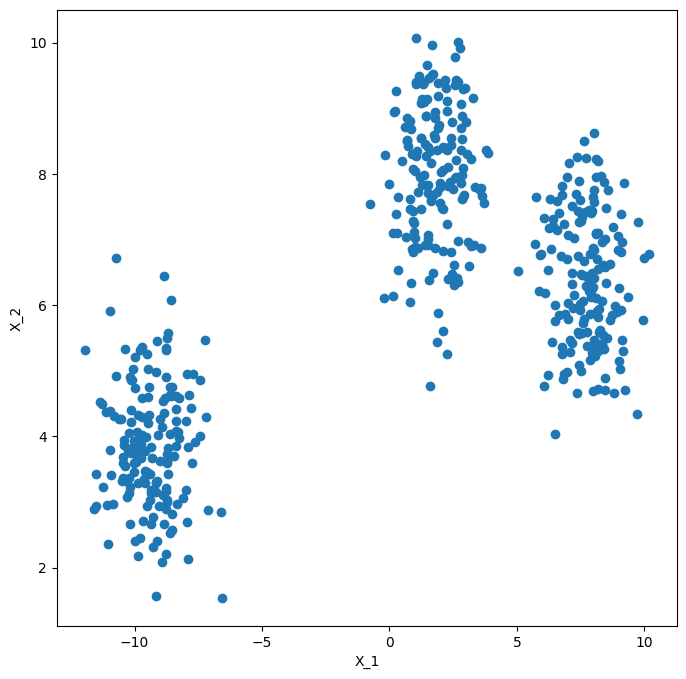

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))
#df.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y')
plt.scatter(x = df['x'], y= df['y'])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

# Helper functions for K-means

In [14]:
def init_centroids(k, X):
  arr =[]
  for i in range(k):
    cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
    cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
    arr.append([cx1, cx2])

  return np.asarray(arr)
  #returns an array in which contains k pairs [x, y] by picking random that x and y from passed dataset

In [15]:


def dist_Euclidean(a, b):
  return np.sqrt(sum(np.square(a - b)))

def dist_Manhattan(a, b):
  return np.sum(np.abs(a - b))

def dist(a, b, distance_metrics):
  if distance_metrics == 'manhattan':
    return dist_Manhattan(a, b)
  elif distance_metrics == 'euclidean':
    return dist_Euclidean(a, b)

In [16]:
# calculating distance between every point and every centroid, returns a list of index of closest clusters correspond to the points
def assign_cluster(k, X, cg, distance_metrics):
  cluster  = [-1]* len(X)
  for i in range(len(X)): # loop data (X)'s index
    dist_arr = []
    for j in range(k): # loop k (amount of centroids/cluster)

      # calculating distance between current point and every cluster
      dist_arr.append(dist(X[i], cg[j], distance_metrics))

    # getting the index of the centroid with the smallest distance & updating the cluster list
    idx = np.argmin(dist_arr)
    cluster[i] = idx

  return np.asarray(cluster)

In [17]:
def compute_centroids(k, X, cluster):
  cg_arr = []


  for j in range(k): # loop k (amount of centroids/cluster)
    arr = []
    for i in range(len(X)): # loop data (X)'s index

      # current cluster = i-th cluster -> append to arr
      if cluster[i] == j:
        arr.append(X[i])

    # gather points for every cluster -> jadiin mean (center of gravity) -> value skalar di store ke cg_arr
    # Average all the x values (first column).
    # Average all the y values (second column).
    cg_arr.append(np.mean(arr, axis = 0))

  # returns as an array
  return np.asarray(cg_arr)

In [18]:
def measure_change(cg_prev, cg_new, distance_metrics):
  res = 0
  for a,b in zip(cg_prev, cg_new):
    res += dist(a,b, distance_metrics)
  return res

In [19]:
def show_clusters(X, cluster, cg):
  # setting dataframe with 3 cols (x, y, label)
  df = DataFrame(dict(x = X[:,0], y = X[:, 1], label = cluster))
  colors = {0: 'blue', 1:'orange', 2:'green'}
  fig, ax = plt.subplots(figsize = (8,8))
  grouped = df.groupby('label')

  # group by the cluster index -> plotting
  for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
    # ax = allows multiple data display in one plot

  # showing the position of centroids
  ax.scatter(cg[:, 0], cg[:, 1], marker = "*", s = 150, c = '#ff2222')

  # labeling & show
  plt.xlabel('X_1')
  plt.xlabel('X_2')
  plt.show()

#K-Means

In [20]:
def k_means(k, X, distance_metrics):

    #returns an array in which contains k pairs [x, y] by picking random that x and y from passed dataset (X) [[2.5, 4.1], [7.2, 3.8], [1.9, 6.0]]
    cg_prev = init_centroids(k, X)

    # placeholder for cluster (later will be containing index of centroids corresponds to points)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:

      # assinging every point with their closest centroid (returns list of centroids)
      cluster = assign_cluster(k, X, cg_prev, distance_metrics) # [0, 1, 2, 0, 2, 1,...]

      # showing the points and centroids
      show_clusters(X, cluster, cg_prev)

      # searching for center of gravity [[2.5, 4.1], [7.2, 3.8], [1.9, 6.0]] (centroid new)
      cg_new = compute_centroids(k, X, cluster)

      # calculate the distance between the centriod new (center of gravity) and the centroid prior
      # update the distance, since its still >.001
      cg_change = measure_change(cg_new, cg_prev, distance_metrics)

      # update the centroid
      cg_prev = cg_new

    return cluster

# cluster comparison

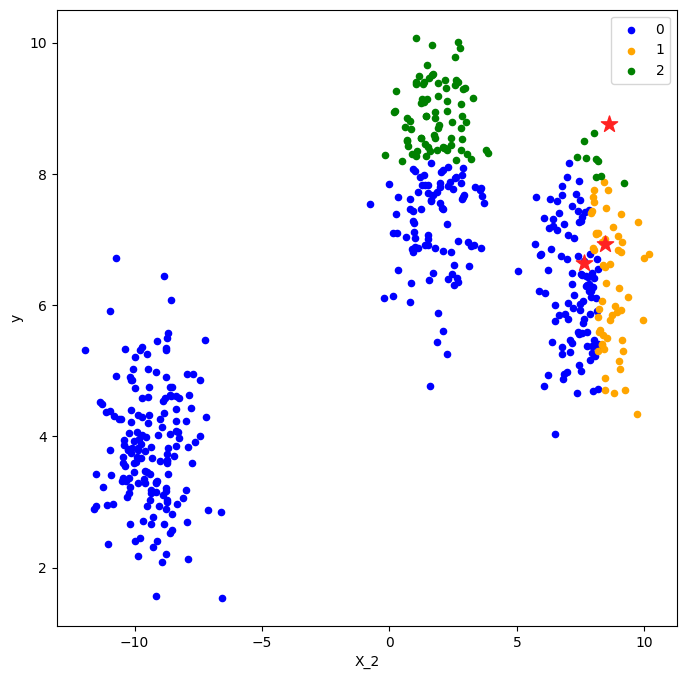

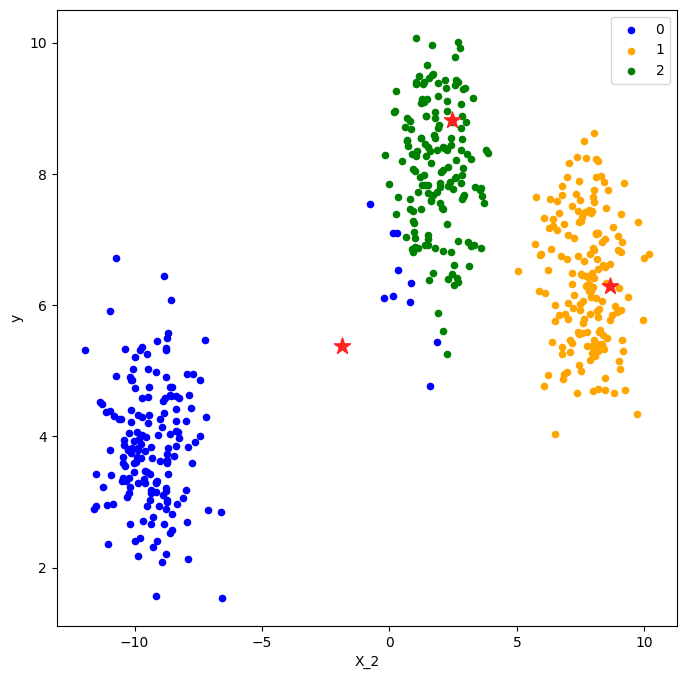

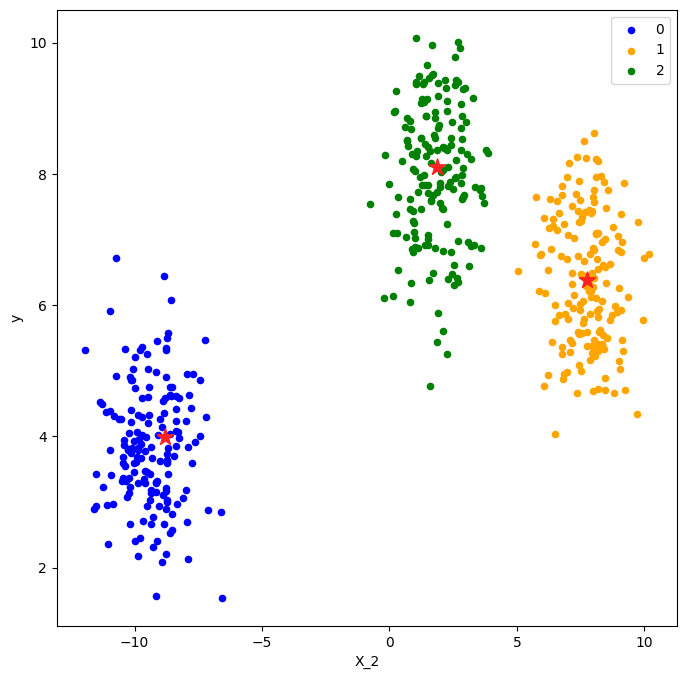

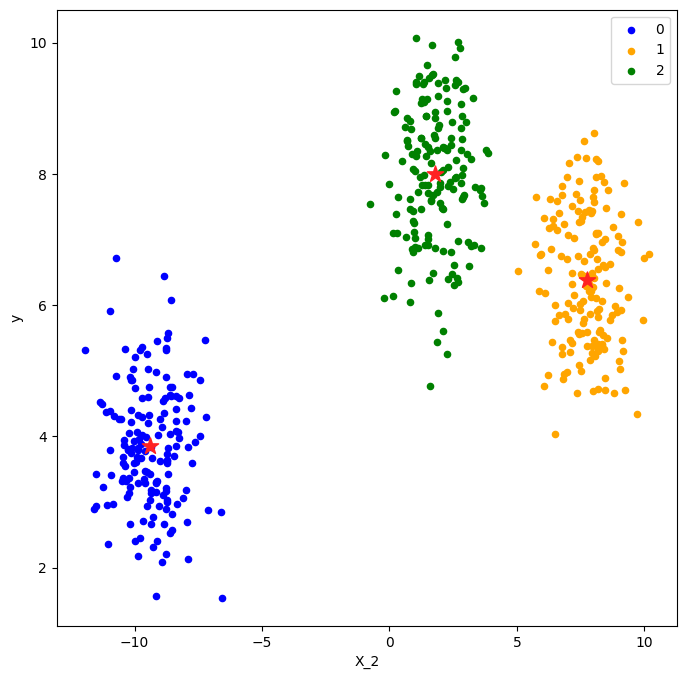

In [21]:
# cluster Manhattan
cluster_manhattan = k_means(3, X_train, 'manhattan')

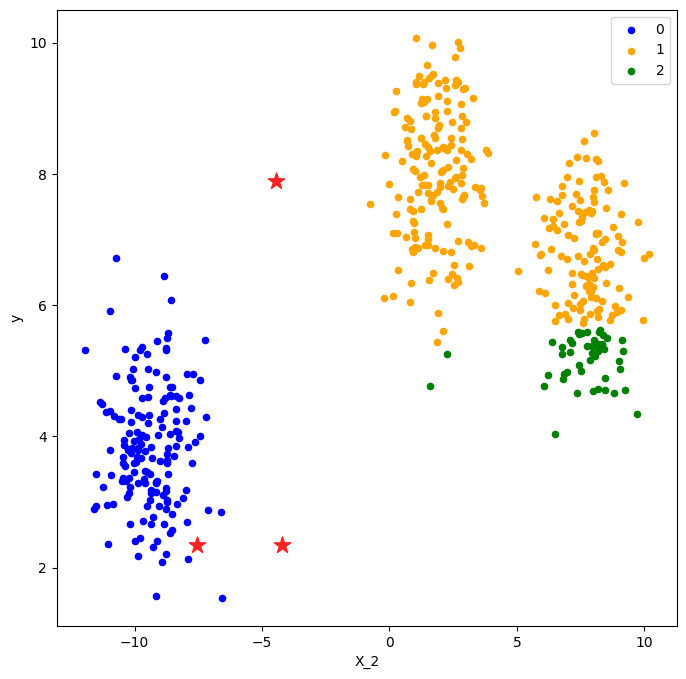

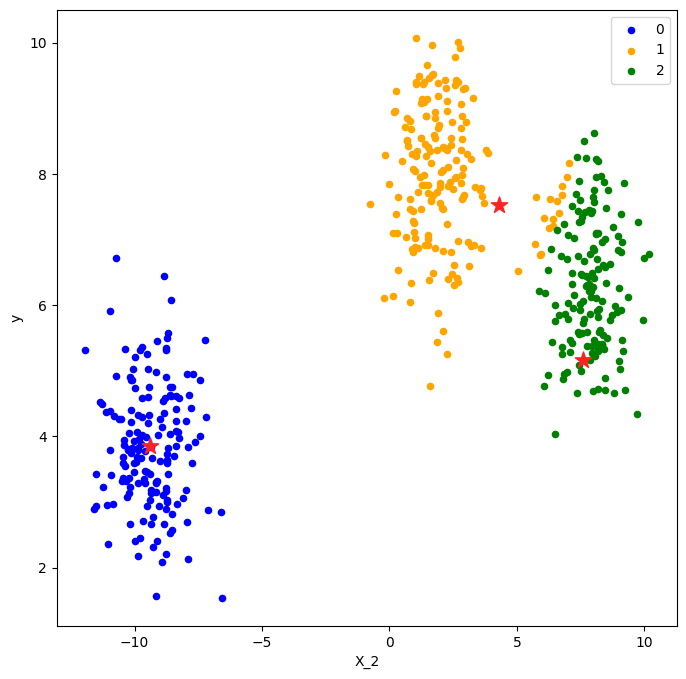

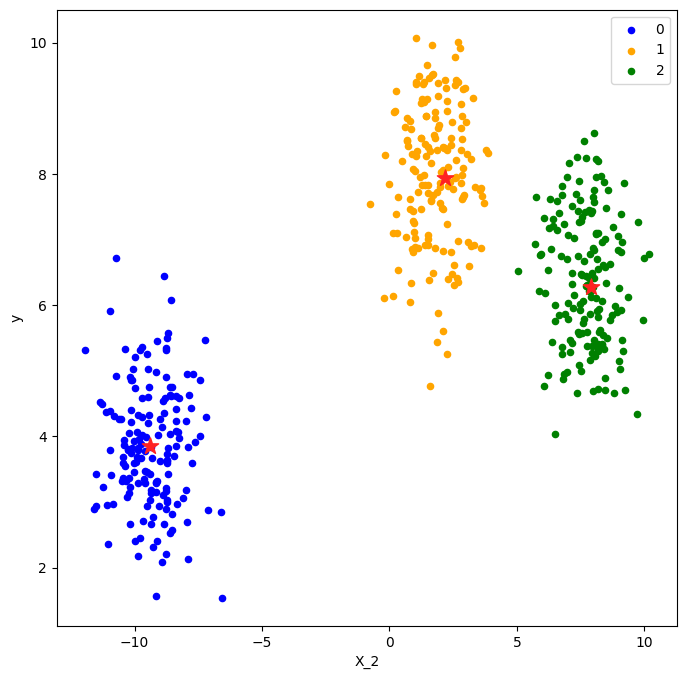

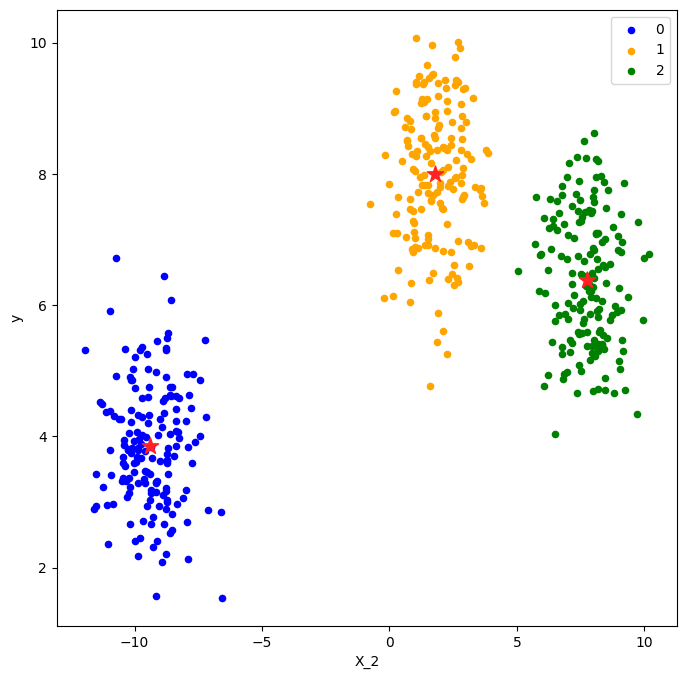

In [22]:
# cluster Euclidean
cluster_euclidean = k_means(3, X_train, 'euclidean')

# conclusion

Both methods, despite using different approaches to update the centroids, produced similar results, as the clusters were classified evenly. However, the centroid indices (which represent their identities) differed between the methods, leading to variations in the plotted colors. This difference is partly due to the random initialization of centroids in each call to k_means, which alters the relative distances among centroids.